In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axisartist.axislines import Subplot 
import plotly.graph_objects as go

import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
import cufflinks as cf
from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib import rcParams

warnings.filterwarnings('ignore')
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

# preproccesing 

uploading the data 

In [76]:
df = pd.read_csv('../data/aqar.csv')

In [77]:
try:
    df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] ,axis=1 , inplace=True)
except:
    i=1

In [78]:
df.columns

Index(['Unnamed: 0', 'user_id', 'id', 'title', 'price', 'content', 'imgs',
       'refresh', 'beds', 'livings', 'wc', 'area', 'street_width', 'age',
       'last_update', 'ketchen', 'ac', 'furnished', 'location', 'path',
       'district', 'width', 'length', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'UserName', 'iam_verified', 'DayOfRent',
       'onMarket', 'timeBeforeRent'],
      dtype='object')

more info about each column in the README file

there are 6762 apartment (this is when i webScraped the data in 6/8/2022)

In [79]:
df.shape

(6762, 32)

this is how many left now  4434

In [80]:
df[df['DayOfRent'] == 0].shape

(4293, 32)

this is how many of the apartment are not there when i last check (rented ) 2328

In [81]:
df[df['DayOfRent'] != 0].shape

(2469, 32)

i will add new column to check if it is rented or not i will 

In [82]:
df['isOffMarket'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

In [83]:
df['isOffMarket'].value_counts()

False    4293
True     2469
Name: isOffMarket, dtype: int64

also i will create two dataframe one will contain the value of rened apartment and the second will contain the values of unrented apartment 

In [84]:
offMarket = df.loc[(df['DayOfRent'] != 0) ]
onMarket = df.loc[(df['DayOfRent'] == 0) ]

# EDA

##  how many apartment are rent it daily 

In [85]:
offMarket.DayOfRent.value_counts()

2     394
4     350
1     282
5     261
8     245
10    212
3     184
9     168
11    141
6     117
7     115
Name: DayOfRent, dtype: int64

In [86]:
offMarket.DayOfRent.value_counts().mean()

224.45454545454547

In [87]:
df.groupby('DayOfRent' , ).size()

DayOfRent
0     4293
1      282
2      394
3      184
4      350
5      261
6      117
7      115
8      245
9      168
10     212
11     141
dtype: int64

In [88]:
temp = pd.DataFrame(columns= ['day' , 'rented' , 'notRented'])
temp['day'] ='0'
temp

,day,rented,notRented


In [89]:



temp = temp.append({'day': '1' ,'rented': df[df['DayOfRent'] == 1 ].shape[0], 'notRented': df[df['DayOfRent'] != 1 ].shape[0] } , ignore_index=True)
temp = temp.append({'day': '2' ,'rented': df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2)].shape[0] , 'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2)].shape[0] } , ignore_index=True)
temp = temp.append({'day': '3' ,'rented': df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) ].shape[0] , 'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) ].shape[0] } , ignore_index=True)
temp = temp.append({'day': '4' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)].shape[0] , 
         
         
         'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '5' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)].shape[0] , 
         
         
         'notRented': df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '6' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '7' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '8' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '9' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)|
         (df['DayOfRent'] == 9)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)&
         (df['DayOfRent'] != 9)].shape[0]} , ignore_index=True)
temp = temp.append({'day': '10' ,

         'rented':df[(df['DayOfRent'] == 1) |
          (df['DayOfRent'] == 2) |
         (df['DayOfRent'] == 3) |
         (df['DayOfRent'] == 4)|
         (df['DayOfRent'] == 5)|
         (df['DayOfRent'] == 6)|
         (df['DayOfRent'] == 7)|
         (df['DayOfRent'] == 8)|
         (df['DayOfRent'] == 9)|
         (df['DayOfRent'] == 10)].shape[0] , 
         
         
         'notRented':df[(df['DayOfRent'] != 1) &
          (df['DayOfRent'] != 2) &
         (df['DayOfRent'] != 3) &
         (df['DayOfRent'] != 4)&
         (df['DayOfRent'] != 5)&
         (df['DayOfRent'] != 6)&
         (df['DayOfRent'] != 7)&
         (df['DayOfRent'] != 8)&
         (df['DayOfRent'] != 9)&
         (df['DayOfRent'] != 10)].shape[0]} , ignore_index=True)

## how fast the apartment got rentet?

In [90]:
fig = go.Figure( layout=go.Layout(
        title=go.layout.Title(text="we can see how is rented apartment is increasing daily ")
    ))
fig.add_trace(go.Scatter(x=temp["day"], y=temp["rented"], name="rented", mode="lines"))
fig.add_trace(go.Scatter(x=temp["day"], y=temp["notRented"], name="notRented", mode="lines"))
# fig.upday_layout(
#     title="ICICI BANK stock prices", xaxis_title="day", yaxis_title="Close"
# )
fig.show()


## is there a price diffrent on rented and unrented apartemnt

In [91]:

fig = px.box(df, 'price' ,'isOffMarket' )
fig.update_layout(
    title="the price diffrence between the rented and unrented apartmrnt ",
    xaxis_title="price",
    yaxis_title = "rented"
    

        
    )
fig.show()


In [92]:
offMarket.describe()

,Unnamed: 0,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,onMarket,timeBeforeRent
count,2469.000000,2.469000e+03,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2414.000000,2405.000000,2189.000000,2466.000000,2464.000000,2458.000000,1852.000000,1852.000000,2330.000000,2469.000000,2469.000000,2469.000000
mean,3354.132847,1.249450e+06,4.517618e+06,40135.504253,2.663832,0.994735,2.066424,182.456089,23.127235,2.743719,0.850770,0.659091,0.050041,17.327921,24.620308,4.360292,5.255974,29.944512,29.944512
std,1947.465918,7.936850e+05,1.223898e+05,28809.895188,1.061134,0.419796,0.833629,478.346170,13.071528,4.412320,0.356387,0.474111,0.218073,41.111296,44.734749,0.408209,3.171760,40.577953,40.577953
min,1.000000,6.130000e+02,1.524584e+06,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1661.000000,5.809750e+05,4.494200e+06,24000.000000,2.000000,1.000000,1.000000,100.000000,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,4.220000,2.000000,10.000000,10.000000
50%,3289.000000,1.049794e+06,4.550590e+06,34000.000000,3.000000,1.000000,2.000000,150.000000,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,13.000000,4.380000,5.000000,19.000000,19.000000
75%,5058.000000,1.992649e+06,4.583789e+06,45000.000000,3.000000,1.000000,3.000000,190.000000,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,18.000000,4.560000,8.000000,39.000000,39.000000
max,6755.000000,2.685054e+06,4.600241e+06,450000.000000,7.000000,4.000000,5.000000,18000.000000,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,450.000000,5.000000,11.000000,1199.000000,1199.000000


In [93]:
onMarket.describe()

,Unnamed: 0,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,DayOfRent,onMarket,timeBeforeRent
count,4293.000000,4.293000e+03,4.293000e+03,4293.000000,4293.000000,4291.000000,4293.000000,4.173000e+03,4147.000000,3868.000000,4279.000000,4279.000000,4259.000000,2810.000000,2810.000000,4033.000000,4293.0,4293.000000,4293.0
mean,3395.664337,1.368855e+06,4.451575e+06,45080.026788,2.515723,0.988348,2.065921,2.862208e+03,23.149506,2.930455,0.881047,0.758822,0.094388,18.194623,62.030694,4.335219,0.0,57.551829,0.0
std,1954.928880,8.512165e+05,2.208027e+05,28738.641085,1.144926,0.483629,0.978609,1.720228e+05,14.196992,4.789445,0.323771,0.427848,0.292403,31.136161,2096.163381,0.519419,0.0,81.712167,0.0
min,0.000000,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,12.000000,0.0
25%,1711.000000,5.809750e+05,4.407449e+06,25000.000000,1.000000,1.000000,1.000000,9.000000e+01,15.000000,0.000000,1.000000,1.000000,0.000000,8.000000,8.000000,4.180000,0.0,22.000000,0.0
50%,3437.000000,1.436306e+06,4.509219e+06,35000.000000,3.000000,1.000000,2.000000,1.400000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.390000,0.0,38.000000,0.0
75%,5083.000000,2.109920e+06,4.564820e+06,65000.000000,3.000000,1.000000,3.000000,1.780000e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,17.000000,4.570000,0.0,69.000000,0.0
max,6761.000000,2.684886e+06,4.600194e+06,360000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,556.000000,111111.000000,5.000000,0.0,2275.000000,0.0


In [94]:
onMarket['area'].sort_values(ascending=False).head(20)

1729    11111100.0
1829      185600.0
5908       11110.0
6221        2780.0
4709        2500.0
3215        2450.0
5669        2000.0
1071        1800.0
3322        1200.0
4197        1000.0
2930        1000.0
703         1000.0
2518        1000.0
2544        1000.0
3092        1000.0
686         1000.0
3665        1000.0
4519        1000.0
5940        1000.0
6114        1000.0
Name: area, dtype: float64

In [95]:
onMarket.shape

(4293, 33)

In [96]:
onMarket[onMarket['area']  >1000].shape

(9, 33)

removing 10 row from 4434 row not a big deal scense there are huge outliers 

In [97]:
onMarket = onMarket[onMarket['area']  <= 1000]

In [98]:
offMarket['area'].sort_values(ascending=False).head(20)

1570    18000.0
5698    10000.0
3127     6400.0
5923     5625.0
1508     3125.0
2970     3000.0
3911     3000.0
6661     2222.0
2831     2040.0
819      2040.0
6416     1230.0
3694     1100.0
721      1000.0
390      1000.0
3277     1000.0
3039      900.0
2307      900.0
2095      900.0
2684      900.0
1186      900.0
Name: area, dtype: float64

and for the off market also we can see that there are 11 out of 2328

In [99]:
offMarket.shape

(2469, 33)

In [100]:
offMarket[offMarket['area']  >1000].shape

(12, 33)

In [101]:
offMarket  = offMarket[offMarket['area'] <= 1000]

In [102]:
offMarket['area'].sort_values(ascending=False).head(20)

390     1000.0
3277    1000.0
721     1000.0
1186     900.0
2307     900.0
2095     900.0
2684     900.0
3039     900.0
2864     800.0
5802     750.0
4080     720.0
930      700.0
720      700.0
3329     700.0
1019     700.0
1491     700.0
4098     700.0
3097     700.0
5593     700.0
6629     630.0
Name: area, dtype: float64

In [103]:
df = df[df['area'] <= 1000]

In [104]:

fig = px.histogram(onMarket, x="area"  )
fig.show()

In [105]:

fig = px.histogram(offMarket, x="area"  )

fig.update_layout(
    title="less disturbution for rented apartment "
    

        
    )
fig.show()

we can notice that in the area for onMarket has a higher distirbution comparing of the offMarket

--------

In [106]:
df['iam_verified'].value_counts()[1] / df['iam_verified'].value_counts().sum()

0.9984452736318408

## a higher volume of apartment in spesific district 

In [107]:
df['district'].value_counts().head(20)

حي النرجس      799
حي العارض      599
حي الملقا      570
حي اليرموك     435
حي الياسمين    329
حي المونسية    261
حي القيروان    235
حي اشبيلية     232
حي قرطبة       217
حي العقيق      176
حي الشهداء     150
حي الرمال      140
حي غرناطة      115
حي ظهرة لبن    112
حي الخليج      111
حي الربيع      104
حي الصحافة      99
حي طويق         89
حي حطين         86
حي المهدية      84
Name: district, dtype: int64

In [108]:
offMarket['district'].value_counts().head(20)

حي النرجس      270
حي العارض      256
حي الملقا      163
حي اليرموك     135
حي الياسمين    112
حي المونسية    109
حي قرطبة        99
حي القيروان     84
حي اشبيلية      75
حي الرمال       70
حي الشهداء      56
حي ظهرة لبن     55
حي العقيق       53
حي طويق         52
حي الربيع       40
حي غرناطة       37
حي الصحافة      37
حي المهدية      36
حي المروج       35
حي الخليج       33
Name: district, dtype: int64

In [109]:

def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

In [110]:
cp =  df.copy()

cp['isOffMarket'].value_counts()
if cp['district'][0] =='حي النظيم':
            for index, row in cp.iterrows():
    
                    cp['district'][index] = modify_arabic_display(cp['district'][index])
        

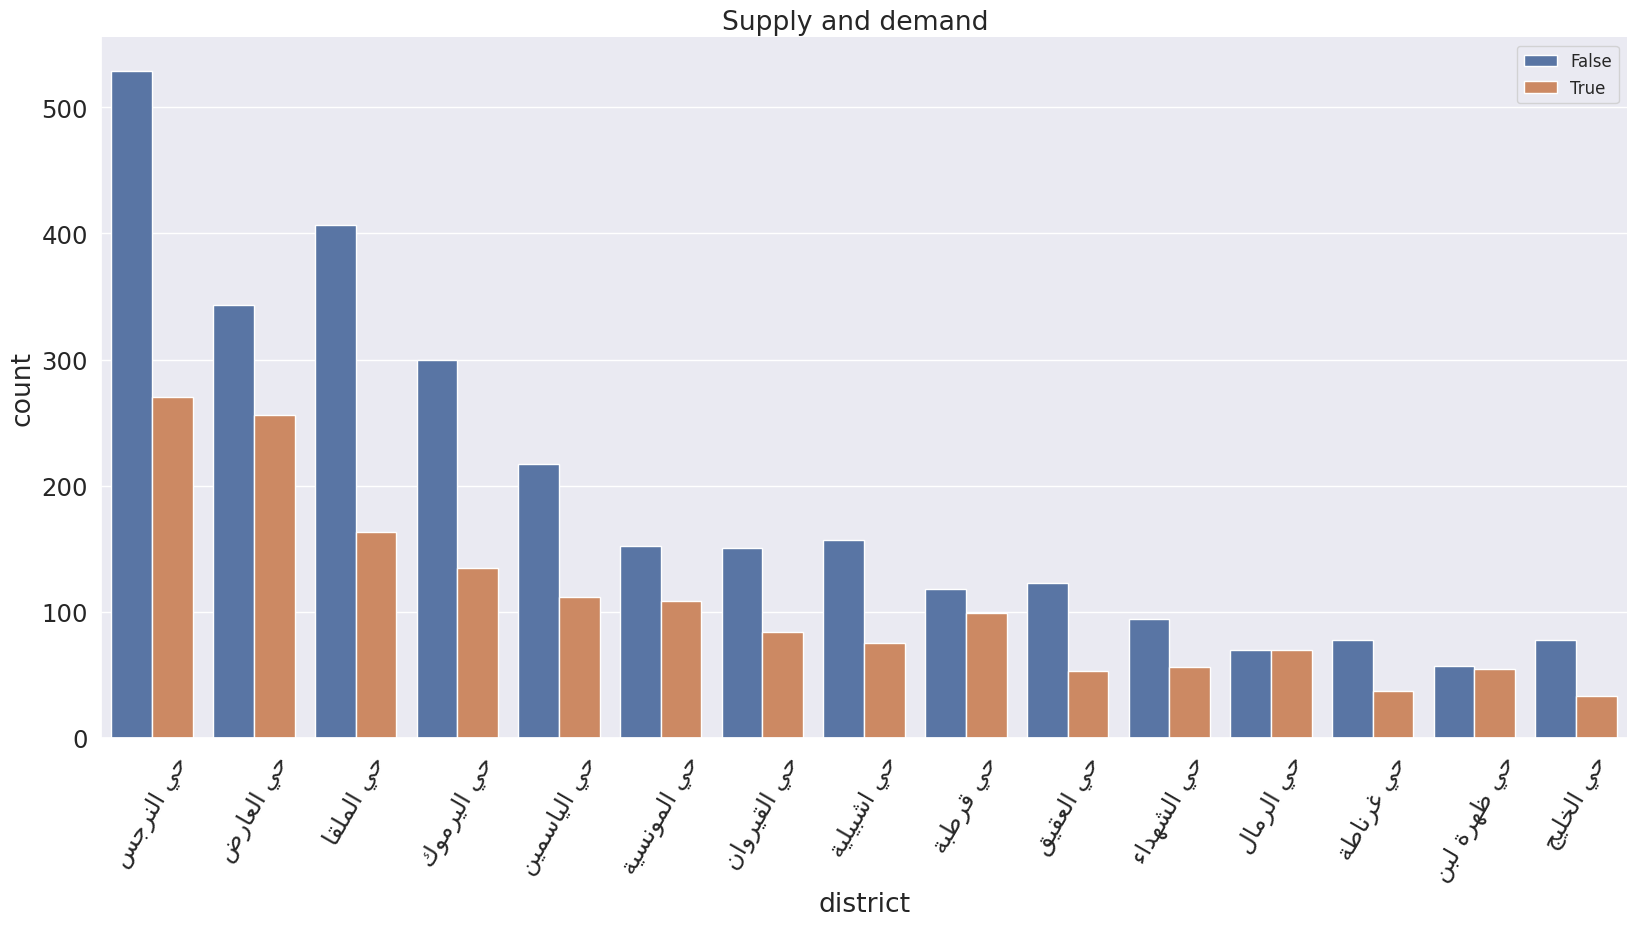

In [111]:
ax = sns.catplot(x="district", hue="isOffMarket", kind="count", data=cp ,  order=cp.district.value_counts().iloc[:15].index , height=8.27, aspect=12.7/6.27 , legend=False )
# ax.set_xlabel("X-Axis")
ax.set_xticklabels(rotation = 60).set(title= "Supply and demand  "  )
sns.set(font_scale = 1.6)
plt.legend(loc="upper right", frameon=True , fontsize= 12  )

In [112]:
a =df.groupby('district').size()
b=  offMarket.groupby('district').size()
totalDIST = pd.concat([a,b], axis=1).rename(columns={0 : 'total'  , 1 : "offMarket"} ).reset_index()
totalDIST['percnt'] = 0
for index , row  in totalDIST.iterrows() :
    try:
        totalDIST['percnt'][index] = row['offMarket'] /  row['total']
    except:
        totalDIST['percnt'][index] = 0 

In [113]:
if totalDIST['district'][0] == 'حي أحد':
    for index, row in totalDIST.iterrows():

            totalDIST['district'][index] = modify_arabic_display(totalDIST['district'][index])

In [114]:
totalDIST1 = totalDIST[totalDIST['percnt'] > .50 ].copy()

In [115]:
totalDIST2 = (totalDIST[totalDIST['total'] > 100 ]).copy()

In [116]:
totalDIST3 = (totalDIST2.sort_values(by='percnt' , ascending=False)).copy()

## what is the most rented district ? 

In [117]:
totalDIST1 = totalDIST1.sort_values(by='percnt' , ascending=False)

Text(0.5, 1.0, 'what are the highest district that are rented')

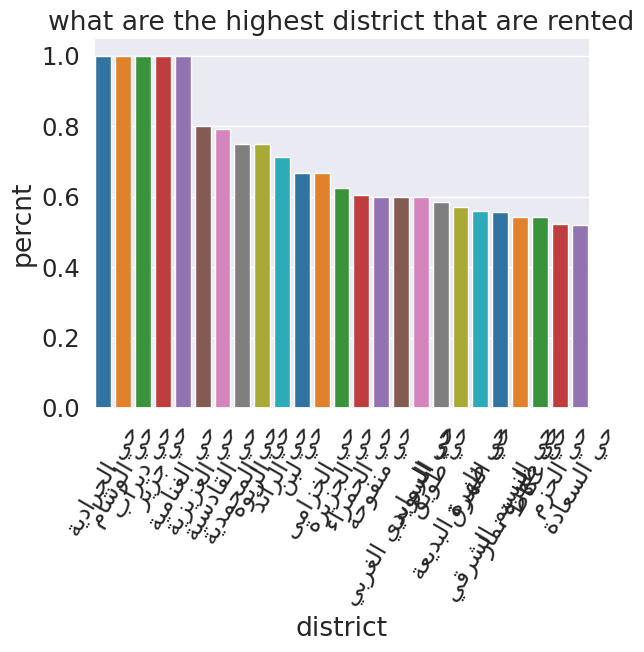

In [118]:
ax = sns.barplot(data= totalDIST1 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)
plt.title('what are the highest district that are rented')

## what is the most reented district that are rented more than 50 times ? 

Text(0.5, 1.0, 'how many apartment is rented in the high supply district')

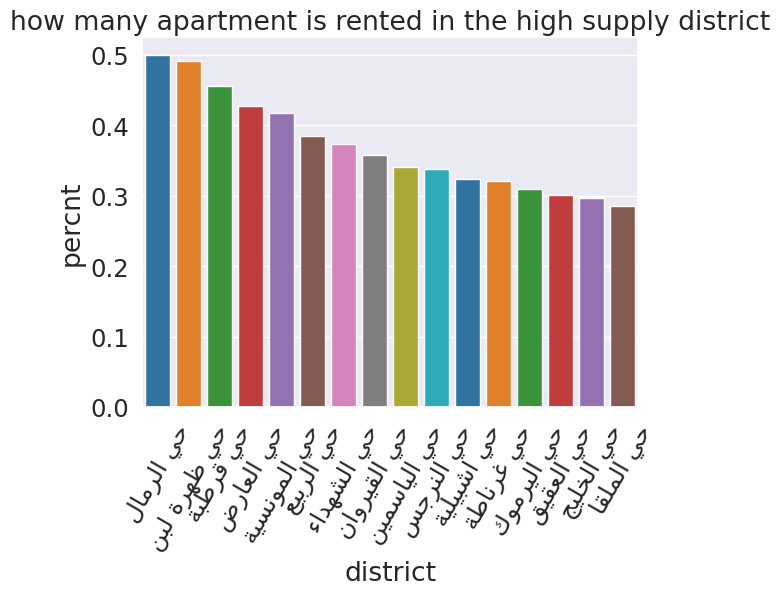

In [119]:
ax = sns.barplot(data= totalDIST3 ,x='district' , y='percnt'  , palette='tab10')
plt.xticks(rotation=60)
plt.title('how many apartment is rented in the high supply district')

AttributeError: 'AxesSubplot' object has no attribute 'tiset'

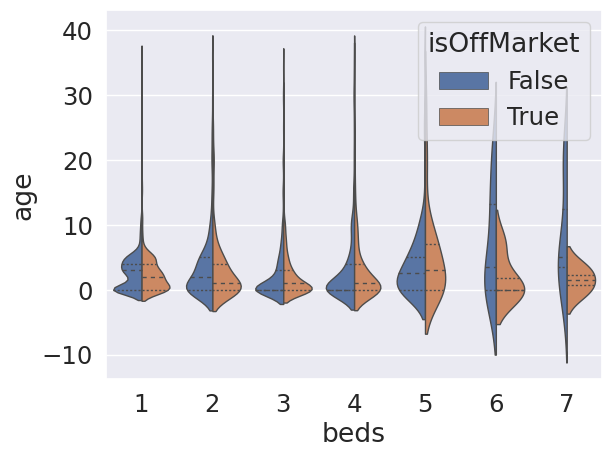

In [120]:



sns.violinplot(data=df, x="beds", y="age", hue="isOffMarket",
               split=True, inner="quart", linewidth=1
            #    palette={"Yes": "b", "No": ".85"}
            ).tiset(tle= "how the number of bedroom and age affect the rented apartment "  )
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set(font_scale = 2)
sns.despine(left=True)

## how long does the apartment stay on maket

In [ ]:
fig = go.Figure(  )
fig.add_trace(go.Histogram( x=onMarket['onMarket']  , name="rented"))
fig.add_trace(go.Histogram( x=offMarket['onMarket'] , name="rented"))
fig.update_layout(
    title="the diffrence between the rented and unrented depending on how much  they stayed on the market ",
    xaxis_title="day on the market",
    
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
        
    ))

# Overlay both histograms
fig.update_layout(barmode='overlay' )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75 )
fig.show()

In [ ]:
onMarket['onMarket'].max()

2273

In [ ]:
px.box(df, 'onMarket' )

In [ ]:
df[df['onMarket'] > 120].shape

(458, 32)

In [ ]:
onMarket[onMarket['onMarket'] > 100].shape

NameError: name 'onMarket' is not defined

In [ ]:
(onMarket[onMarket['onMarket'] > 70].shape[0]/df[df['onMarket'] > 70].shape[0])*100

85.99290780141844

In [ ]:
(df[df['onMarket'] > 70].shape[0]/df[df['onMarket'] > 70].shape[0])*100

100.0

In [ ]:
onMarket1 = onMarket.copy()
offMarket1 = offMarket.copy()

In [ ]:
offMarket1= offMarket[offMarket['onMarket'] < 120]
onMarket1= onMarket[onMarket['onMarket'] < 120]

## why drop onMarket ?

the problem with this feature is since i webscrape every day for 12 days
if there is an apartment that create  in 6/8/2022(the main data where i first starts webScraping) and it was rent  in 7/08/2022 it will be one day on market so there wont be any off market in the first 12 days (so for any new user if he/she wants to put a new apartment the ML model will predict that it will be rented ) 


In [ ]:
offMarket1= offMarket[offMarket['onMarket'] < 120]
onMarket1= onMarket[onMarket['onMarket'] < 120]
fig = go.Figure(  )
fig.add_trace(go.Histogram( x=onMarket1['onMarket']  , name="notRent"))
fig.add_trace(go.Histogram( x=offMarket1['onMarket'] , name="rented"))
fig.update_layout(
    title="the diffrence between the rented and unrented depending on how much  they stayed on the market ",
    xaxis_title="day on the market",
    
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
        
    ))

# Overlay both histograms
fig.update_layout(barmode='overlay' )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75 )
fig.show()

In [123]:
len(df[df['onMarket']<12])

730